In [218]:
import pandas as pd # Data preperation and data readings 
import numpy as np 
import matplotlib.pyplot as plt # Plots
import seaborn as sb # Prettier plots
import folium # Maps
from branca.element import Figure

OPPGAVER: 

1. wildfires per month
2. wildfires avg acresburned per year

In [219]:
ds = pd.read_csv("California_Fire_Incidents.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [220]:
firedep_ds = pd.read_excel("CalFireDepartments.xlsx")

firedep_ds.head()

Department Name   Latitude   Longitude
0          Butte County Unit  39.644268 -121.800067
1  San Mateo-Santa Cruz Unit  37.512188 -122.338668
2          Fresno Kings Unit  36.676022 -119.616011
3          Lassen-Modoc Unit  40.424895 -120.677065
4             San Diego Unit  32.749183 -116.926775

In [221]:
cols=["Location", "SearchDescription", "SearchKeywords", 
"CanonicalUrl", "Final", "Featured", "FuelType", "Updated", 
"StructuresEvacuated", "Active", "ConditionStatement", 
"ControlStatement", "Public", "PercentContained", "Status"]
ds_copy = ds.copy()

ds_copy = ds_copy.drop(cols, axis = 1)
ds_copy["Extinguished"] = pd.to_datetime(ds_copy["Extinguished"])
ds_copy["Started"] = pd.to_datetime(ds_copy["Started"])
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   Counties              1636 non-null   object             
 6   CountyIds             1636 non-null   object             
 7   CrewsInvolved         171 non-null    float64            
 8   Dozers                123 non-null    float64            
 9   Engines               191 non-null    float64            
 10  Extinguished          1577 non-null   datetime64[ns, UTC]
 11  Fatalities            21 non-null     float64            
 12  Helico

In [222]:
# Segmentating data and adding aditional information.

# Add the time of the fire duration.
ds_copy["FireDuration"] = -(ds_copy["Started"]-ds_copy["Extinguished"])

#Segmentating the data based on how big (how many acres burned) the wild fire is.
meanAcresBurned = ds_copy["AcresBurned"].mean()
ds_copy.loc[ds_copy["AcresBurned"]>meanAcresBurned+10000, "WildfireSize"] = "BigWildfire"
ds_copy.loc[ds_copy["AcresBurned"]<=meanAcresBurned+10000, "WildfireSize"] = "AvgWildfire"
ds_copy.loc[ds_copy["AcresBurned"]<=meanAcresBurned-2000, "WildfireSize"] = "SmallWildfire"
ds_copy.head()

AcresBurned                                          AdminUnit  AirTankers  \
0     257314.0  Stanislaus National Forest/Yosemite National Park         NaN   
1      30274.0  USFS Angeles National Forest/Los Angeles Count...         NaN   
2      27531.0  CAL FIRE Riverside Unit / San Bernardino Natio...         NaN   
3      27440.0                              Tahoe National Forest         NaN   
4      24251.0                       Ventura County Fire/CAL FIRE         NaN   

   ArchiveYear  CalFireIncident     Counties CountyIds  CrewsInvolved  Dozers  \
0         2013             True     Tuolumne        55            NaN     NaN   
1         2013             True  Los Angeles        19            NaN     NaN   
2         2013             True    Riverside        33            NaN     NaN   
3         2013            False       Placer        31            NaN     NaN   
4         2013             True      Ventura        56           47.0     8.0   

   Engines  ...             Name  PersonnelInvolved                   Started  \
0      NaN  ...         Rim Fire                NaN 2013-08-17 15:25:00+00:00   
1      NaN  ...  Powerhouse Fire                NaN 2013-05-30 15:28:00+00:00   
2      NaN  ...    Mountain Fire                NaN 2013-07-15 13:43:00+00:00   
3      NaN  ...    American Fire                NaN 2013-08-10 16:30:00+00:00   
4    117.0  ...     Springs Fire             2167.0 2013-05-02 07:01:00+00:00   

   StructuresDamaged  StructuresDestroyed  StructuresThreatened  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   
2                NaN                  NaN                   NaN   
3                NaN                  NaN                   NaN   
4                6.0                 10.0                   NaN   

                               UniqueId WaterTenders     FireDuration  \
0  5fb18d4d-213f-4d83-a179-daaf11939e78          NaN 20 days 03:05:00   
1  bf37805e-1cc2-4208-9972-753e47874c87          NaN  9 days 03:02:00   
2  a3149fec-4d48-427c-8b2c-59e8b79d59db          NaN 15 days 04:17:00   
3  8213f5c7-34fa-403b-a4bc-da2ace6e6625          NaN 19 days 15:30:00   
4  46731fb8-3350-4920-bdf7-910ac0eb715c         11.0  8 days 23:29:00   

  WildfireSize  
0  BigWildfire  
1  BigWildfire  
2  BigWildfire  
3  BigWildfire  
4  BigWildfire  

[5 rows x 27 columns]

In [223]:
# Add additional column with bool value where the av fire duration is lower than the mean of dataset without outliers.
lowerOutlier = ds_copy["FireDuration"].quantile(0.05) # Remove lower outliers
upperOutlier = ds_copy["FireDuration"].quantile(0.95) # Remove upper outliers
ds_copy1 = ds_copy[(ds_copy["FireDuration"]>lowerOutlier) & (ds_copy["FireDuration"]<upperOutlier)] # New dataset for mean without outliers
meanFireDuration = ds_copy1["FireDuration"].mean() # Mean of new dataset

ds_copy.loc[ds_copy["FireDuration"]>meanFireDuration, "Fast Extinguishing"] = False
ds_copy.loc[ds_copy["FireDuration"]<=meanFireDuration, "Fast Extinguishing"] = True

# map values 0 to false and 1 to true
ds_copy["Fast Extinguishing"] = ds_copy["Fast Extinguishing"].astype("bool")
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   Counties              1636 non-null   object             
 6   CountyIds             1636 non-null   object             
 7   CrewsInvolved         171 non-null    float64            
 8   Dozers                123 non-null    float64            
 9   Engines               191 non-null    float64            
 10  Extinguished          1577 non-null   datetime64[ns, UTC]
 11  Fatalities            21 non-null     float64            
 12  Helico

In [224]:
# Drop rows where the longitude and latitude is outside California
# California Latitude: 32 to 42
# California Longitude: -114 to -124
ds_copy = ds_copy[ds_copy.Latitude>32]
ds_copy = ds_copy[ds_copy.Latitude<42]
ds_copy = ds_copy[ds_copy.Longitude<-114]
ds_copy = ds_copy[ds_copy.Longitude>-124]

Text(0, 0.5, 'Amount of Wildfires')

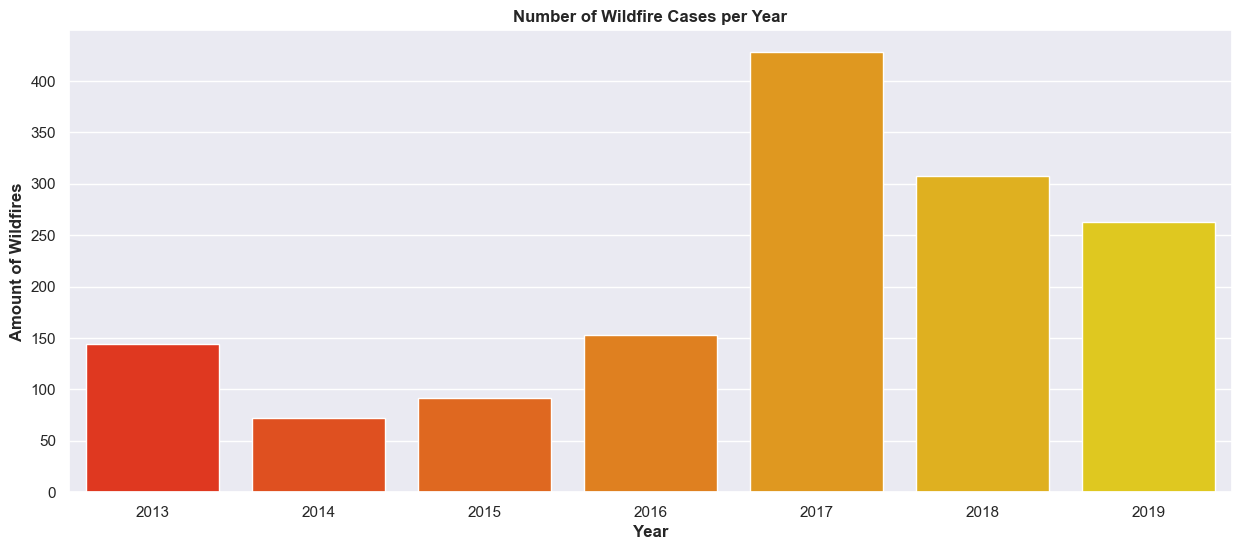

In [225]:
# Number of wildfires per year
plt.title("Number of Wildfire Cases per Year", fontdict=dict(weight='bold'))
numWildfires = sb.countplot(x="ArchiveYear", data=ds_copy, palette="autumn")
numWildfires.set_xlabel(xlabel='Year', fontdict=dict(weight='bold'))
numWildfires.set_ylabel(ylabel='Amount of Wildfires', fontdict=dict(weight='bold'))

Text(0, 0.5, 'Acres Burned')

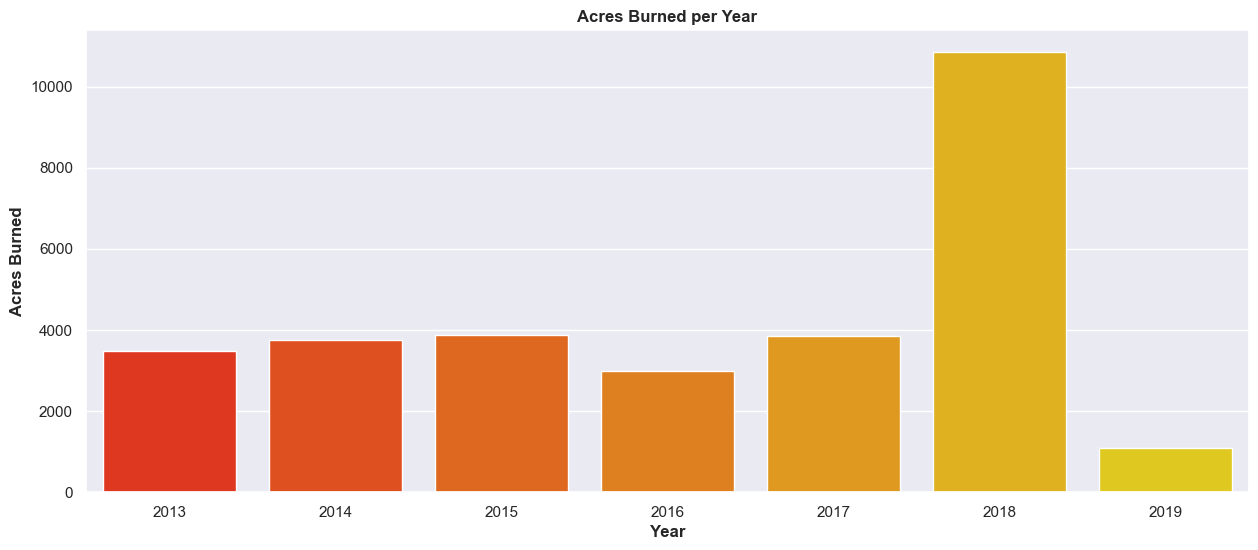

In [226]:
plt.title("Acres Burned per Year", fontdict=dict(weight="bold"))
acresBurnedPerYear = sb.barplot(x="ArchiveYear", y="AcresBurned", data=ds_copy, ci=0, palette="autumn")
acresBurnedPerYear.set_xlabel(xlabel= "Year", fontdict=dict(weight='bold'))
acresBurnedPerYear.set_ylabel(ylabel='Acres Burned', fontdict=dict(weight='bold'))

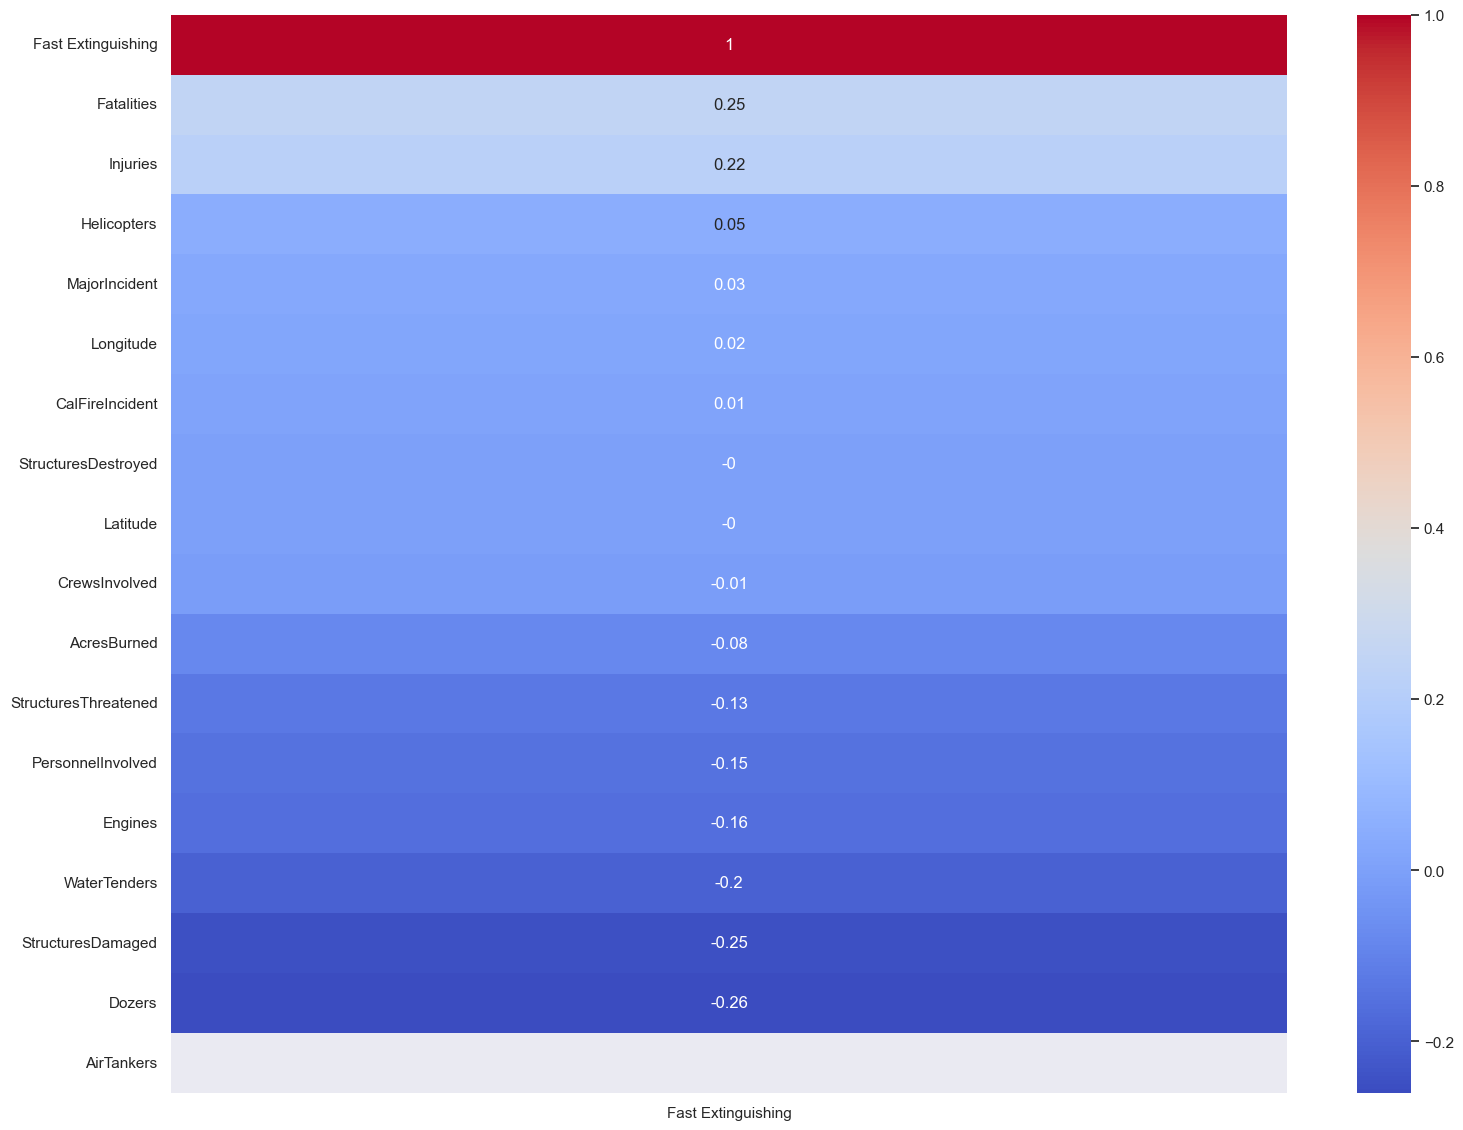

In [227]:
# Correlation between columns and "Fast Extinguishing"
corr_ds = ds_copy.drop(["UniqueId", "Counties", "CountyIds", "Extinguished", "Started", "Name", "FireDuration", "AdminUnit", "WildfireSize", "ArchiveYear"], axis=1)
x = round(corr_ds.corr(),2)
plt.figure(figsize=(18,14))
sb.heatmap(x[["Fast Extinguishing"]].sort_values(by=["Fast Extinguishing"], ascending=False), cmap='coolwarm', annot=True)
plt.show()

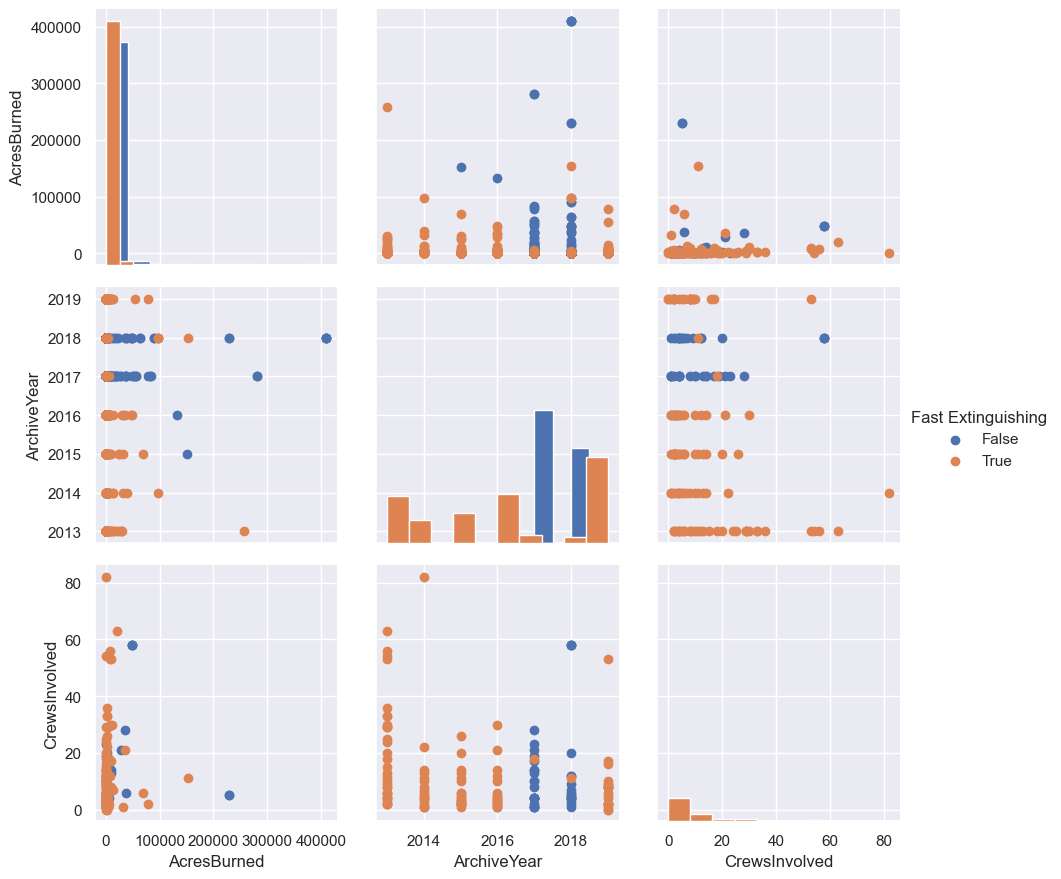

In [228]:
# Pair plot columns from the dataset and show for which wildfire size they are from
pairplot = sb.PairGrid(data=ds_copy, vars = ["AcresBurned", "ArchiveYear", "CrewsInvolved"], hue="Fast Extinguishing", height=3)
pairplot.map_diag(plt.hist)
pairplot.map_offdiag(plt.scatter)
pairplot.add_legend()

In [229]:
# Create a folium map and place a circle in the map for each of the wildfires from 2013-2020 with a larger radius depending on how big the wildfire was 
# ; uncomment the layercontrol line if you want other maptypes
fig=Figure(width=550,height=350)

map = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
fig.add_child(map)
folium.TileLayer('Stamen Terrain').add_to(map)
#folium.LayerControl().add_to(map)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])*20
  folium.Circle(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(map)
map

In [230]:
# Create a folium map for each of the wildfires under the category of "BigWildfire"; uncomment the layercontrol line if you want other maptypes
from folium.plugins import MarkerCluster
fig2=Figure(width=550,height=350)

bigFireMap = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
cluster_marker = MarkerCluster().add_to(bigFireMap)
fig2.add_child(bigFireMap)
folium.TileLayer('Stamen Terrain').add_to(bigFireMap)
#folium.LayerControl().add_to(bigFireMap)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])/20
  if ds_copy.iloc[i]["WildfireSize"] == "BigWildfire":
    folium.CircleMarker(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(cluster_marker)
bigFireMap

In [231]:
# Heat maps with visualization of County CAL units
from folium import plugins
from folium.plugins import HeatMap
fig3=Figure(width=1200,height=900)

heat_map = folium.Map(location=[36,-120], zoom_start=5)

fig3.add_child(heat_map)
folium.TileLayer('Stamen Terrain').add_to(heat_map)

HeatMap(data=ds_copy[['Latitude', 'Longitude']], radius=15).add_to(folium.FeatureGroup(name='Heat Map').add_to(heat_map))
folium.LayerControl().add_to(heat_map)
for i in range (0, firedep_ds.shape[0]):
    #folium.Circle(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], radius=500, color = "black", fill=True, fill_opacity= 1, tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)
    folium.map.Marker(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], icon=folium.Icon(color="black", icon="fire-extinguisher", prefix="fa"), tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)
heat_map # display

In [232]:
# Create a folium map and place a circle in the map for each of the wildfires from 2013-2020 with a larger radius depending on how big the wildfire was 
# ; uncomment the layercontrol line if you want other maptypes
fig=Figure(width=550,height=350)

hot_spot = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
cluster_marker = MarkerCluster().add_to(hot_spot)
fig.add_child(hot_spot)
folium.TileLayer('Stamen Terrain').add_to(hot_spot)
#folium.LayerControl().add_to(map)
for i in range (0, ds_copy.shape[0]):
  r = np.sqrt(ds_copy.iloc[i]["AcresBurned"])/50
  folium.CircleMarker(location=[ds_copy.iloc[i]["Latitude"], ds_copy.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(cluster_marker)

for i in range (0, firedep_ds.shape[0]):
    #folium.Circle(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], radius=500, color = "black", fill=True, fill_opacity= 1, tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(heat_map)
    folium.map.Marker(location=[firedep_ds.iloc[i]["Latitude"], firedep_ds.iloc[i]["Longitude"]], icon=folium.Icon(color="black", icon="fire-extinguisher", prefix="fa"), tooltip=firedep_ds.iloc[i]["Department Name"]).add_to(hot_spot)
hot_spot

In [233]:
# Heat maps with visualization per year
from folium import plugins
from folium.plugins import HeatMap
fig3=Figure(width=550,height=350)

heat_map2 = folium.Map(location=[36,-120], zoom_start=5)

fig3.add_child(heat_map2)
folium.TileLayer('Stamen Terrain').add_to(heat_map2)

for val in ds_copy["ArchiveYear"].unique():
    df = ds_copy[ds_copy.ArchiveYear == val]
    HeatMap(data=df[['Latitude', 'Longitude']], radius=20).add_to(folium.FeatureGroup(name=str(val), show=False).add_to(heat_map2))


folium.LayerControl().add_to(heat_map2)

heat_map2

In [238]:
# Clustering of wildfires per year
from folium import plugins
fig=Figure(width=550,height=350)

hot_spot2 = folium.Map(location=[36.778259, -119.417931], zoom_start=5)
fig.add_child(hot_spot2)
folium.TileLayer('Stamen Terrain').add_to(hot_spot2)

for val in ds_copy["ArchiveYear"].unique():
  df = ds_copy[ds_copy.ArchiveYear == val]
  cluster_marker2 = MarkerCluster(name=str(val), show=False).add_to(hot_spot2)
  for i in range (0, df.shape[0]):
    r = np.sqrt(df.iloc[i]["AcresBurned"])/50
    folium.CircleMarker(location=[df.iloc[i]["Latitude"], df.iloc[i]["Longitude"]], radius=r, color = "red", fill_color = "orange").add_to(cluster_marker2)

folium.LayerControl().add_to(hot_spot2)

hot_spot2

[Text(0, 0, '82013'),
 Text(1, 0, '52013'),
 Text(2, 0, '72013'),
 Text(3, 0, '92013'),
 Text(4, 0, '112013'),
 Text(5, 0, '102013'),
 Text(6, 0, '62013'),
 Text(7, 0, '22013'),
 Text(8, 0, '42013'),
 Text(9, 0, '122013'),
 Text(10, 0, '92014'),
 Text(11, 0, '72014'),
 Text(12, 0, '52014'),
 Text(13, 0, '82014'),
 Text(14, 0, '62014'),
 Text(15, 0, '42014'),
 Text(16, 0, '12014'),
 Text(17, 0, '32014'),
 Text(18, 0, '102014'),
 Text(19, 0, '72015'),
 Text(20, 0, '62015'),
 Text(21, 0, '82015'),
 Text(22, 0, '92015'),
 Text(23, 0, '42015'),
 Text(24, 0, '102015'),
 Text(25, 0, '52015'),
 Text(26, 0, '22015'),
 Text(27, 0, '112015'),
 Text(28, 0, '72016'),
 Text(29, 0, '62016'),
 Text(30, 0, '82016'),
 Text(31, 0, '92016'),
 Text(32, 0, '112016'),
 Text(33, 0, '102016'),
 Text(34, 0, '52016'),
 Text(35, 0, '42016'),
 Text(36, 0, '122017'),
 Text(37, 0, '72017'),
 Text(38, 0, '82017'),
 Text(39, 0, '102017'),
 Text(40, 0, '92017'),
 Text(41, 0, '52017'),
 Text(42, 0, '62017'),
 Text(43, 0

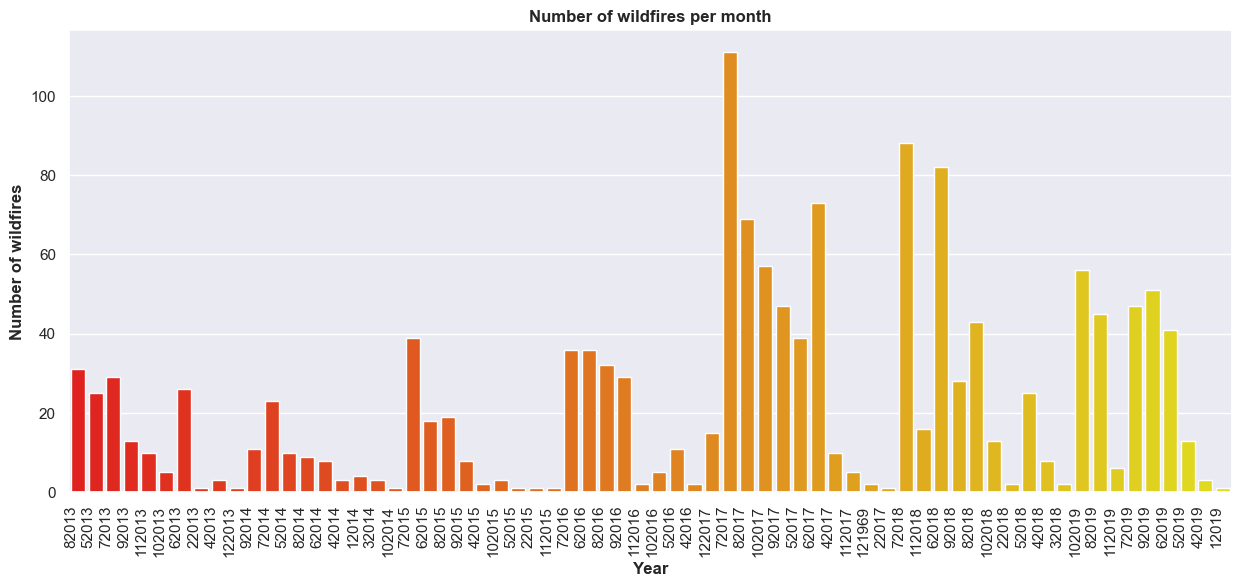

In [235]:
ds_copy["ArchiveMonth"] = pd.DatetimeIndex(ds_copy["Started"]).month.astype(str) + pd.DatetimeIndex(ds_copy["Started"]).year.astype(str)
plt.title("Number of wildfires per month", fontdict=dict(fontweight="bold"))
plt.rcParams["figure.figsize"] = (15,6)
numWildfiresPerMonth = sb.countplot(x="ArchiveMonth", data=ds_copy, palette="autumn")
numWildfiresPerMonth.set_xlabel(xlabel="Year", fontdict=dict(fontweight="bold"))
numWildfiresPerMonth.set_ylabel(ylabel="Number of wildfires", fontdict=dict(fontweight="bold"))
numWildfiresPerMonth.set_xticklabels(numWildfiresPerMonth.get_xticklabels(), rotation=90, ha="right")